/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (638, 779, 3) looks like an RGB image
  warn(msg.format(image.shape))
/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


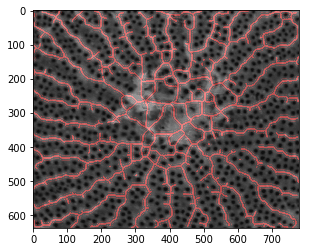

In [3]:
#ADAPTIVE SKELETON WITH 3 COLORS SEEMS TO WORK BEST

import matplotlib.pyplot as plt
import cv2
img = cv2.imread('cropped_Wild007.tif')
blur = cv2.blur(img,(15,15))
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
from skimage.filters import threshold_otsu
thotsu=threshold_otsu(blur)
otsublur = blur[:,:,0]> thotsu

from skimage.morphology import skeletonize
otsuskeleton = skeletonize(otsublur)
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(otsuskeleton, cmap=red2, interpolation='sinc', alpha=.42) 

In [4]:
from PIL import Image
im=Image.open('cropped_Wild007.tif')
width, height=im.size

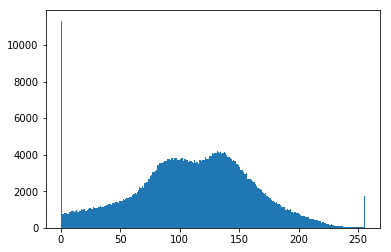

109.84035476718404

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild007.tif',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

np.mean(img)


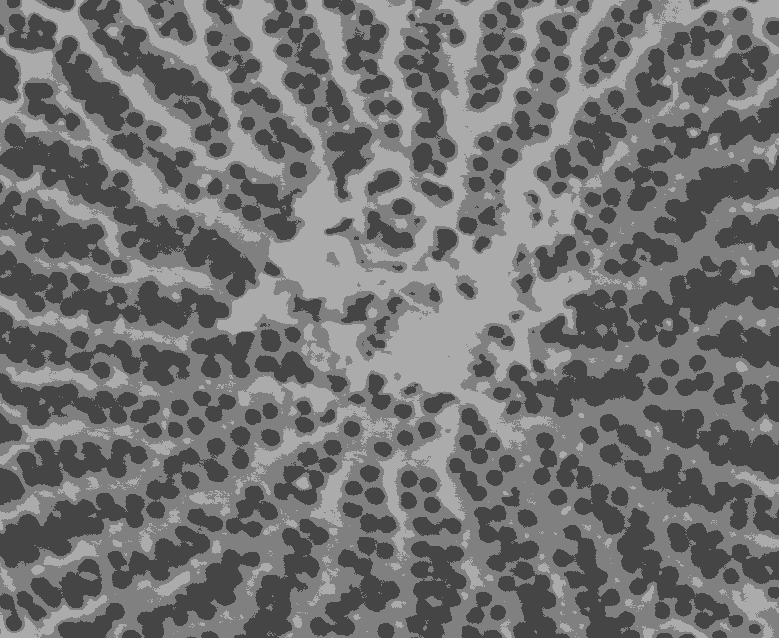

In [6]:
im.quantize(3,0)

<PIL.Image.Image image mode=P size=779x638 at 0x1C1A832898>


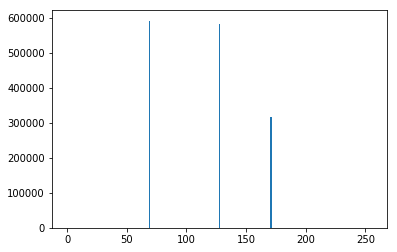

[[[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [171 171 171]
  [171 171 171]
  [171 171 171]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [171 171 171]
  [171 171 171]
  [171 171 171]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [171 171 171]
  [171 171 171]
  [171 171 171]]

 ...

 [[171 171 171]
  [171 171 171]
  [171 171 171]
  ...
  [128 128 128]
  [128 128 128]
  [128 128 128]]

 [[171 171 171]
  [171 171 171]
  [171 171 171]
  ...
  [128 128 128]
  [128 128 128]
  [128 128 128]]

 [[171 171 171]
  [171 171 171]
  [171 171 171]
  ...
  [128 128 128]
  [128 128 128]
  [128 128 128]]]


In [7]:
image=im.quantize(3,0)
image.save('simple_Wild007.tif')
print(image)
newimg = cv2.imread('simple_Wild007.tif')
plt.hist(newimg.ravel(),256,[0,255]); plt.show()
print(newimg)
newnewimg=newimg[:,:,0]

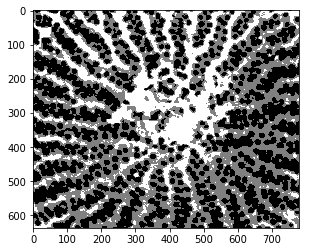

In [22]:
newimg[np.where(newimg == [171])] = [255]
newimg[np.where(newimg == [69])] = [0]
plt.imshow(newimg, cmap='gray')

In [61]:
ablur = cv2.blur(newnewimg,(32, 32))
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,61,4) 

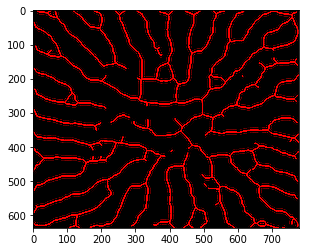

In [62]:
#ADAPTIVE SKELETON
from skimage.morphology import skeletonize
adaptiveskeleton = skeletonize(a_mthres)
ax = plt.subplot()
ax.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc')

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


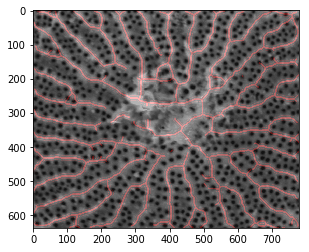

In [63]:
import matplotlib.image as mpimg
img2=mpimg.imread('cropped_Wild007.tif')
imgplot2 = plt.imshow(img2, alpha= .9)

ax2 = plt.subplot()
ax2.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc', alpha=0.3) 
plt.show()